In [1]:
import numpy as np
import matplotlib.pyplot as plt

import quadrotor

def plotStates(state,t,u):

    plt.figure(figsize=[9,6])

    plt.subplot(2,3,1)
    plt.plot(t, state[0,:])
    plt.legend(['X'])

    plt.subplot(2,3,2)
    plt.plot(t, state[2,:])
    plt.legend(['Y'])

    plt.subplot(2,3,3)
    plt.plot(t, state[4,:])
    plt.legend(["theta"])

    plt.subplot(2,3,4)
    plt.plot(t, state[1,:])
    plt.legend(['Vx'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,5)
    plt.plot(t, state[3,:])
    plt.legend(['Vy'])
    plt.xlabel('Time [s]')

    plt.subplot(2,3,6)
    plt.plot(t, state[5,:])
    plt.legend(['omega'])
    plt.xlabel('Time [s]')

    # plt.savefig('Part3_disturb.jpg',bbox_inches='tight', dpi=150)

    plt.figure()
    plt.plot(t[:-1], u.T)
    plt.legend(['u1', 'u2'])
    plt.xlabel('Time [s]')

    # plt.savefig('Part3_disturb_control.jpg',bbox_inches='tight', dpi=150)
    plt.show()


def get_linearization(z, u):
    '''
    Args:
    z - the current state of the system at timestsep i
    u - the current control at timestsep i

    Returns:
    A, B - the matrices defining the linearization of the dynamics
    '''
    delt = quadrotor.DELTA_T
    m = quadrotor.MASS
    I = quadrotor.INERTIA
    l = quadrotor.LENGTH

    A = np.diag(np.ones(z.shape[0]))
    B = np.zeros((z.shape[0],u.shape[0]))

    A[0,1] = A[2,3] = A[4,5] = delt
    A[1,4] = (delt/m)*(-np.cos(z[4])*u[0]-np.cos(z[4])*u[1]) 
    A[3,4] = (delt/m)*(-np.sin(z[4])*u[0]-np.sin(z[4])*u[1])

    B[1,0] = B[1,1] = (delt/m)*(-np.sin(z[4]))
    B[3,0] = B[3,1] = (delt/m)*(np.cos(z[4]))
    B[5,0] = (delt/I)*(l)
    B[5,1] = (delt/I)*(-l)

    return A,B

def zeroPosControl(state, i=0):
    '''
    Args:
    state - the current state of the system at timestsep i

    Returns:
    The u0 and u1 such that the robot stays at a fixed position forever
    '''
    u = np.ones([2,])
    totalU = (quadrotor.MASS*quadrotor.GRAVITY)/np.cos(state[4])

    u[0] = totalU/2
    u[1] = totalU/2

    return u

## Following a Circular Trajectory

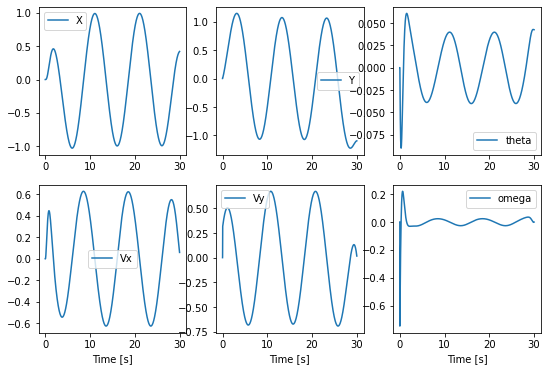

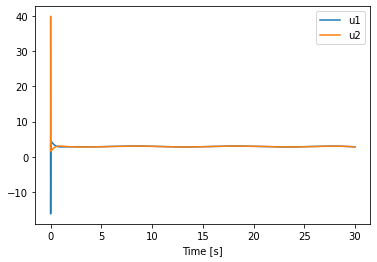

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAA3A9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
DcBliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAA5Kr/b71mP6Kb4AAAFdAC
shIkDRqBfetCvEAVUOaOCT/9nLr9mTKx/UEGXNIx5yzRp1ThzPF1a7cBOfoeV9rWW9MlXAV4nPOB
K25SkyW06uB3fGJd5HI2KNBsDdIF+b9+/fdQbFwnGMNpmshlYl+wRIMZD7cH//6bE0/3g3vKyzpp
XTGBB3OqI+WPpR0oY73sOGMx594Xnwtr6o26ZSevIf/3ceGUyB9QVYCnujHJoBuPbA4nemKubQNn
Exd0WNXVac0DRwPEj/XiMHLceKmYHtStIoCcK9DD7DfhJrwqrAnhngh95FfJPAmN+myDnFE2gDvY
xdoF+mN8OvBwQ2/2y5whzb0T+mxDyRCyxatKHBAsJ8tIhwAARk8UXYkS5iv+zNsCp4JBQEL7tNpG
QhFePiTGEqAGMhpz/Wl9ctm6rkxEOzXfAbUU3LxbGT2iIKXOdy8Ic7Z5+Vaa96dV+cKsltZsRrUI
+Gm3rRdNXJi/Tvo+J4M9+rHtxTWHM7WeXifOTo3vsy9JS+xx4Dhzz1EGvEoYL3WcNbN/5vLsdirb
8HAojtuh6d2kjdjKmkn3Hg3EH0Y08lrBri6OCiXNtkuQNf/LQSInCPNQC3ptVHNZbkAo4Q7lvyjS
6NIhLyM/ilnhH1BsPQBI9mFwuhTiW4zluGtj7SmAMPT1zwNRK3JKMYYm5AOcvxzTOrqy3Yn4li3p
/fbQQ8UFMGhlQhyLmYJpDewoReT73Dbiin9LPZWJ7rJIGMdyjSAjyYcsjjK6w96wIQ7z/+UAJ5Y+
gSDe6LSkAAADADFAEtw3fbvW4WEkBHUkO9MD11EmMpQXjWN07czS0fdPWW6WdAhqGhifKLXU5DJr
+4Hb8ctG2f4Gof76fJj/VOI0dQeS4BxhsFpmv0vM2JtNBV72FhnWjFlemNOmqEcSW8tqnJ3fhx0o
D7cRp3fERFSmUx6c9epEN/7ASi0HWgHvgIVvjmflIUOtGzjG3k0vy6jfAzgRHBwxxecZ9xzPysIM
M7kaLaR953iTh8AChCRmjp3P110HFj3JZfauygjBWmsotEtveXy/oOGSCp80IuakLC49j+CF22Fp
/597t3tL8G8OYouz+t7KtjlYULZ0jK3GWhJs6wqS+lzIlS6SBD4AELARPxNeDidloOy/AAADAAAO
VphDVNBjz+moNupbqhznUMPe+ikeYZLeIkeeRZtoYLuxwnwqWrZhiVPyeas6cseMTZMhT8ZHhTjD
x7j1P/+5rUPlSJYWI5bbhK+1g49xKFoB8fvnN875+1OMLgstU3+isylPef1zhbzqUiCG8dVyCIUB
8AFxTZYvH7PmVxdaqPjAHZMIEUbt3yD/58Qb6orYCoNnDb+ifuY/46KZZZHJ69Oh+mvUKfVKyMgS
x193/D9JgEjX1IBsM/8acAyPtkoN4isAsOhZrr4u0iH3zPQh/psk85MVm1KVJcYmnstIIlRfhFtO
mjXyOqMIn3u2QDG+93iNR/feOYT+D2J8VdrLdBJmoy0iUWjGM54MMVO//xEiexVJlp497Wc79SpJ
GHzoAD2wAEcMWRK5if305sTqLAsn4i6MEcHBwqDQExMbkN70yXxT4SypaA6UA/MpbGCp5cYVkfgv
/AJIq0en/w+NIXWQmFLjQP8xLbdvSm0L3ZJsDf5remW2qP0O+z0uixnAcxEE4qAU0/3QVc2lv4Ti
h6DJv6wNM4QiSijGFt06GalYV/4KFA/hCeKt6Sy8Zrfb/f15eFgBcvafkkX/2m0dII6Jsv+Gx5NA
CVBAA79UYHHRuyzrrcY3CddVVMotY+2LuGW0fBNBUGaknnM8yQYPqcKWZuu19Scj/nxgLtKAEBli
M0CBLeAunA+bcidL38rhQDYJCNCOCku1XVlEWOOYdpwniW/tsB9NCLF8F0Hn89NZLh4F4GZch0K6
r/PWzIAAIfU6tCP+4eJZPbta6VaJLXABLzOn9iS7/BS/F6NH9r86Z+VcAtANS64vjZCympHRRb6q
yznBGsOvAsDxjIWw/dR3VP/raW5/w5TLMOwi8yUOIdX2rlp2CkTEl8CCYfc7cIPmIR/zUjWHCI97
I//a+zkwbiwEqfy0COZeGo74KftfO+HkIB/hticq1yGvPt/Rl2NjeyPOiIMadrKfOr4dznXPb6R8
+AAAEMAADbMlL75lY3NB4Ry/UGLIF8ygm8n/6MURL95FHi1xQmFymhree7YVfPxHlUhADkHY/5tr
DF1vIzkn3nHCZCaytFWund+C65/YHguB/Hd36nBnQgLG6CWpyq0eIhsmaK9VxyC65wlkdWHv5/wm
mpOZIJVhMF7i5a/Hr72sYVre18PwxrOnIhjTP/+uPTIW0kK6Zxt43r+uFqgcd/sLlpWf/0Xs1vrx
6myO7Gotu7okk70Y7I0MGYC47pPWZsm+9A47Q6TCrxQaLwvh0lSPM5XaiLR+lk3tn6WMZ0jzsSi5
FTGrLf/J3u/0iS2mzw8ya0y+ZrWlj+XsX/j0eA285u7B3SgWMK3aOdvj6mbZkpyEfM3DE3+d6LVu
olbcAWFWGWdiFbIsst3JnQed705nCesNf9nTOp/dDjqZg29tOcYUERKlyXNUT3HbEmOX5PkoKP4u
udvPQJFrIitIlqy6QgMkcQ3WltDprzrzL/JX+aN8H8c0arl4rgwn6SsSpHP6Ou3ei+GnK5pkjzkQ
c1piWvPaDoUj6FMhY3FJv3si2bz/+Cl+LzkD/TKCE5nmDqK2Q/PF5A7X6EhnI6JUAsR+Nk5niw5q
HDoNzmajSRmDsB8LNEgWpW9YxbMPUGb3wzujuCxMsAD91Us2kbr9lx0L0wSbNhFO/wyHj4u8k+Qw
YTo0S0UXujtABQtD5O7A4

In [2]:

def solve_LQR_trajectory(Q, R, x_bar, N):
    '''
    Args:
    A, B - The matricies defining the linearised dynamics
    Q, R - The Hessians wrt the state and control respectively.
    x_bar - The trajectory of desired states
    N - is the horizon length
    
    Returns:
    K_gains -  A list of gains
    K_feedforward - A list of feedforward controls for finding u
    '''
    A,B = get_linearization(x_bar[:,0],u_star)

    P = [np.zeros((Q.shape))]*(N+1)
    P[N] = (Q)

    p = [np.zeros(((-Q@x_bar[:,N]).shape))]*(N+1)
    p[N] = -Q@x_bar[:,N]

    temp  = (np.linalg.inv((-(((B.transpose()@P[N])@B) + R)))@(B.transpose()@(P[N]@A)))
    K_gains = [np.zeros((temp.shape))]*N


    temp2 = (np.linalg.inv((-(((B.transpose()@P[N])@B) + R)))@(B.transpose()@p[N]))
    k_feedforward = [np.zeros((temp2.shape))]*N
    
    
    for i in reversed(range(N)):
        A,B = get_linearization(x_bar[:,i],u_star)
        
        myK = (np.linalg.inv((-(((B.transpose()@P[i+1])@B) + R)))@(B.transpose()@(P[i+1]@A)))
        K_gains[i] = (myK) 

        myP = Q + (A.T@(P[i+1]@A)) + (A.T@(P[i+1]@(B@K_gains[i])))
        P[i] = (myP)

        my_k = (np.linalg.inv((-(((B.transpose()@P[i+1])@B) + R)))@(B.transpose()@p[i+1]))
        k_feedforward[i] = (my_k)

        q = -Q@x_bar[:,i]
        my_p = q + (A.T@(p[i+1])) + (A.T@(P[i+1]@(B@k_feedforward[i])))
        p[i] = my_p

    return K_gains, k_feedforward


    
def trajectoryController(z,i):
    '''
    K_gains is a list of feedback gains of length N
    k_feedforward is a list of feedforward controls of length N
    z is the current state 
    i is the current time step (for indexing K_gains and k_feedforward)
    '''
    u = K_gains[i-1]@(z-trajectory[:,i]) + k_feedforward[i-1] + u_star

    return u


### WRITE CODE THAT SOLVES THE PROBLEM HERE ###

N = 3000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
# z0[0] = 1
# z0[3] = 1

z_star = z0
u_star = zeroPosControl(z0)
Q = np.diag([3.5,10,3.5,10,10,10])*100
# Q = np.eye(6)*100
R = np.eye(2)*0.001

x_bar_0deg = np.ndarray((quadrotor.NUMBER_STATES,N+1))
x_bar_45deg = np.ndarray((quadrotor.NUMBER_STATES,N+1))
omega = 0.002*np.pi

for i in range(N+1):
    x_bar_0deg[:,i:i+1] = [[np.cos(i*(omega))],
                [-(omega)*np.sin(i*(omega))],
                [np.sin(i*(omega))],
                [(omega)*np.cos(i*(omega))],
                [0],
                [0]]

    x_bar_45deg[:,i:i+1] = [[np.cos(i*(omega))],
                [-(omega)*np.sin(i*(omega))],
                [np.sin(i*(omega))],
                [(omega)*np.cos(i*(omega))],
                [np.sign(np.cos(i*(omega)))*np.pi/4],
                [0]]


trajectory = x_bar_0deg
# plt.plot(range(N+1), trajectory[0,:], '--')
# plt.plot(range(N+1), trajectory[1,:], '--')
# plt.plot(range(N+1), trajectory[2,:], '--')
# plt.plot(range(N+1), trajectory[3,:], '--')
# plt.legend(['x','vx','y','vy'])
K_gains, k_feedforward = solve_LQR_trajectory(Q, R, trajectory, N)

##### Simulating Results ####
t, state, u = quadrotor.simulate(z0, trajectoryController, N, disturbance = False)

plotStates(state,t,u)
quadrotor.animate_robot(state, u)